 방식으로 분할 처리하는 것을 그룹 연산이라 함
- 그룹 연산은 데이터를 집계, 변환, 필터링하는데 효율적이며 판다스 groupby() 메소드를 사용함
- 그룹 객체 만들기(분할)
- 그룹 연산 메소드(적용, 결합) 

In [38]:
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
df = titanic.loc[:,['age','sex','class','fare','survived']]

print('승객 수:', len(df))
print(df.head())

승객 수: 891
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
1  38.0  female  First  71.2833         1
2  26.0  female  Third   7.9250         1
3  35.0  female  First  53.1000         1
4  35.0    male  Third   8.0500         0


In [39]:
df.value_counts('class')

class
Third     491
First     216
Second    184
dtype: int64

In [40]:
grouped = df.groupby(['class'])
# list(grouped)
for key, group in grouped:
    print('* key:', key)
    print('* number:', len(group))
    print(group.head())

* key: First
* number: 216
     age     sex  class     fare  survived
1   38.0  female  First  71.2833         1
3   35.0  female  First  53.1000         1
6   54.0    male  First  51.8625         0
11  58.0  female  First  26.5500         1
23  28.0    male  First  35.5000         1
* key: Second
* number: 184
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
17   NaN    male  Second  13.0000         1
20  35.0    male  Second  26.0000         0
21  34.0    male  Second  13.0000         1
* key: Third
* number: 491
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
2  26.0  female  Third   7.9250         1
4  35.0    male  Third   8.0500         0
5   NaN    male  Third   8.4583         0
7   2.0    male  Third  21.0750         0


In [41]:
average = grouped.mean()
average

age       fare  survived
class                                 
First   38.233441  84.154687  0.629630
Second  29.877630  20.662183  0.472826
Third   25.140620  13.675550  0.242363

In [42]:
grouped.max()

age   sex      fare  survived
class                                 
First   80.0  male  512.3292         1
Second  70.0  male   73.5000         1
Third   74.0  male   69.5500         1

In [43]:
# Q. 'Third'그룹만을 선택해서 group3 이름으로 저장하고 통계요약표를 출력하세요.(describe())
group3 = grouped.get_group('Third')
group3.describe()

age        fare    survived
count  355.000000  491.000000  491.000000
mean    25.140620   13.675550    0.242363
std     12.495398   11.778142    0.428949
min      0.420000    0.000000    0.000000
25%     18.000000    7.750000    0.000000
50%     24.000000    8.050000    0.000000
75%     32.000000   15.500000    0.000000
max     74.000000   69.550000    1.000000

In [44]:
# class 열, sex 열을 기준으로 분할하여 grouped_two에 저장
grouped_two = df.groupby(['class','sex'])
for key, group in grouped_two:
    print('* key:', key)
    print('* number:', len(group))
    print(group.head)

* key: ('First', 'female')
* number: 94
<bound method NDFrame.head of       age     sex  class      fare  survived
1    38.0  female  First   71.2833         1
3    35.0  female  First   53.1000         1
11   58.0  female  First   26.5500         1
31    NaN  female  First  146.5208         1
52   49.0  female  First   76.7292         1
..    ...     ...    ...       ...       ...
856  45.0  female  First  164.8667         1
862  48.0  female  First   25.9292         1
871  47.0  female  First   52.5542         1
879  56.0  female  First   83.1583         1
887  19.0  female  First   30.0000         1

[94 rows x 5 columns]>
* key: ('First', 'male')
* number: 122
<bound method NDFrame.head of       age   sex  class      fare  survived
6    54.0  male  First   51.8625         0
23   28.0  male  First   35.5000         1
27   19.0  male  First  263.0000         0
30   40.0  male  First   27.7208         0
34   28.0  male  First   82.1708         0
..    ...   ...    ...       ...       

In [45]:
average_two = grouped_two.mean()
average_two

age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447

In [46]:
group3f = grouped_two.get_group(('Third','female'))
group3f.head()

age     sex  class     fare  survived
2   26.0  female  Third   7.9250         1
8   27.0  female  Third  11.1333         1
10   4.0  female  Third  16.7000         1
14  14.0  female  Third   7.8542         0
18  31.0  female  Third  18.0000         0

In [47]:
group3f[['age','fare']].describe()

age        fare
count  102.000000  144.000000
mean    21.750000   16.118810
std     12.729964   11.690314
min      0.750000    6.750000
25%     14.125000    7.854200
50%     21.500000   12.475000
75%     29.750000   20.221875
max     63.000000   69.550000

적용-결합 데이터 집계(agg)

- 집계 연산을 처리하는 사용자 정의함수를 그룹 객체에 적용하려면 agg() 메소드 사용
- 모든 열에 여러 함수를 매핑: group객체.agg([함수1,함수2,함수3,....])
- 각 열마다 다른 함수를 매핑: group객체.agg({'열1':함수1,'열2':함수2,...}]

변환(transform)

- 원소의 본래 행 인덱스와 열 이름을 기준으로 연산 결과를 반환
- 데이터 변환 연산 : group객체.transform(매핑함수)

필터링(filter)

- 그룹 객체에 filter() 메소드를 적용할 때 조건식을 가진 함수를 전달하면 조건이 참인 그룹만을 남김
- 그룹 객체 필터링: group객체.filter(조건 함수식)

객체에 함수 매핑(apply)

- 판다스 객체의 개별 원소를 특정 함수에 일대일로 매핑. 사용자가 원하는 대부분의 연산을 그룹 객체에 적용
- group객체.apply(매핑함수)

##### Q  (최대값 - 최소값)을 반환하는 사용자 함수를 정의하고 agg()함수에 인수로 전달하여 그룹별로 집계하여
##### agg_minmax 이름으로 저장후 처음 5개행을 출력하세요


In [1]:
import numpy as np
import seaborn as sns
titanic = sns.load_dataset('titanic')
df = titanic.loc[:,['age','sex','class','fare','survived']]
grouped = df.groupby(['class'])
grouped.head(1)

# def min_max(df):
#     df1 = max(df) - min(df)
#     return df1
# df1 = min_max(df)


age     sex   class     fare  survived
0  22.0    male   Third   7.2500         0
1  38.0  female   First  71.2833         1
9  14.0  female  Second  30.0708         1

##### Q grouped의 모든 열에 min,max 함수를 적용

In [2]:
agg_all = grouped.agg(['min','max'])
agg_all.head()

age           sex       fare           survived    
         min   max     min   max  min       max      min max
class                                                       
First   0.92  80.0  female  male  0.0  512.3292        0   1
Second  0.67  70.0  female  male  0.0   73.5000        0   1
Third   0.42  74.0  female  male  0.0   69.5500        0   1

#### Q grouped에서 age열은 mean, fare 열은 min,max 함수 적용

In [16]:
agg_sep = grouped.agg({'age':'mean','fare':['min','max']})
agg_sep

age fare          
             mean  min       max
class                           
First   38.233441  0.0  512.3292
Second  29.877630  0.0   73.5000
Third   25.140620  0.0   69.5500

#### Q. 데이터의 개수가 200개 이상인 그룹만을 필터링하여 데이터프레임으로 반환하여 처음 5개행 출력

In [19]:
grouped_filter = grouped.filter(lambda x: len(x)>=200).head()
print(grouped_filter,'\n')
grouped_filter.value_counts('class')

    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
1  38.0  female  First  71.2833         1
2  26.0  female  Third   7.9250         1
3  35.0  female  First  53.1000         1
4  35.0    male  Third   8.0500         0 



class
Third     3
First     2
Second    0
dtype: int64

#### Q. age열의 평균이 30보다 작은 그룹만을 필터링하여 데이터프레임으로 반환하여 age_filter 저장 후 끝에서 5개 출력

In [29]:
age_filter = grouped.filter(lambda x : x.age.mean() < 30)
age_filter.tail(5)

age     sex   class    fare  survived
884  25.0    male   Third   7.050         0
885  39.0  female   Third  29.125         0
886  27.0    male  Second  13.000         0
888   NaN  female   Third  23.450         0
890  32.0    male   Third   7.750         0

#### Q. 각 그룹별 통계요약표를 집계하세요

In [30]:
for key, group in grouped:
    print(key, group.describe(),'\n')

First               age        fare    survived
count  186.000000  216.000000  216.000000
mean    38.233441   84.154687    0.629630
std     14.802856   78.380373    0.484026
min      0.920000    0.000000    0.000000
25%     27.000000   30.923950    0.000000
50%     37.000000   60.287500    1.000000
75%     49.000000   93.500000    1.000000
max     80.000000  512.329200    1.000000 

Second               age        fare    survived
count  173.000000  184.000000  184.000000
mean    29.877630   20.662183    0.472826
std     14.001077   13.417399    0.500623
min      0.670000    0.000000    0.000000
25%     23.000000   13.000000    0.000000
50%     29.000000   14.250000    0.000000
75%     36.000000   26.000000    1.000000
max     70.000000   73.500000    1.000000 

Third               age        fare    survived
count  355.000000  491.000000  491.000000
mean    25.140620   13.675550    0.242363
std     12.495398   11.778142    0.428949
min      0.420000    0.000000    0.000000
25%     18.

In [31]:
agg_grouped = grouped.apply(lambda x : x.describe())
agg_grouped

age        fare    survived
class                                           
First  count  186.000000  216.000000  216.000000
       mean    38.233441   84.154687    0.629630
       std     14.802856   78.380373    0.484026
       min      0.920000    0.000000    0.000000
       25%     27.000000   30.923950    0.000000
       50%     37.000000   60.287500    1.000000
       75%     49.000000   93.500000    1.000000
       max     80.000000  512.329200    1.000000
Second count  173.000000  184.000000  184.000000
       mean    29.877630   20.662183    0.472826
       std     14.001077   13.417399    0.500623
       min      0.670000    0.000000    0.000000
       25%     23.000000   13.000000    0.000000
       50%     29.000000   14.250000    0.000000
       75%     36.000000   26.000000    1.000000
       max     70.000000   73.500000    1.000000
Third  count  355.000000  491.000000  491.000000
       mean    25.140620   13.675550    0.242363
       std     12.495398   11.778142    0.428949
       min      0.420000    0.000000    0.000000
       25%     18.000000    7.750000    0.000000
       50%     24.000000    8.050000    0.000000
       75%     32.000000   15.500000    0.000000
       max     74.000000   69.550000    1.000000

#### Q. 평균값에서 표준편차의 몇배 떨어져 있는지 평가하는 사용자 함수 작성

In [48]:
def z_score(x):
    return (x- x.mean())/x.std()
                       

#### Q. 위에서 구한 사용자 함수를 이용하여 age 칼럼을  transform()함수로 변환하세요

In [49]:
grouped.age.transform(z_score)[:3]

0   -0.251342
1   -0.015770
2    0.068776
Name: age, dtype: float64

#### Q. 위에서 구한 사용자 함수를 이용하여 age 칼럼을 apply()함수로 매핑하여 출력

In [50]:
grouped.age.apply(z_score)[:3]

0   -0.251342
1   -0.015770
2    0.068776
Name: age, dtype: float64

In [51]:
grouped[['age']].apply(lambda x : z_score(x))[:3]

age
0 -0.251342
1 -0.015770
2  0.068776

In [52]:
df1 = df.groupby(['class','sex'])
type(df1)

pandas.core.groupby.generic.DataFrameGroupBy

#### Q. 클래스 값이 First인 행을 선택하여 출력

In [53]:
df2 = df1.mean()
print(df2,'\n')
type(df2)

                     age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447 



pandas.core.frame.DataFrame

In [54]:
df2.loc['First']

age        fare  survived
sex                                    
female  34.611765  106.125798  0.968085
male    41.281386   67.226127  0.368852

#### Q. class 값이 First이고 sex값이 female인 행을 선택하여 출력하세요.

In [55]:
df2.loc[('First','female')]

age          34.611765
fare        106.125798
survived      0.968085
Name: (First, female), dtype: float64

피벗

- 피벗 테이블을 구성하는 4가지 요소(행 인덱스, 열 인덱스, 데이터 값, 데이터 집계함수)에 적용할 데이터프레임의 열을 각각 지정하여 함수의 인자로 전달

In [4]:
import pandas as pd
df2 = pd.read_pickle('./dataset/df2.pkl')
df2.head()

0   1   2   3   4
0  c0  c1  c2  c3  c4
1   0   1   2   3   4
2   5   6   7   8   9

In [7]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
df = titanic.copy()
df = df.loc[:,['age','sex','class','fare','survived']]
df.head()

age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
1  38.0  female  First  71.2833         1
2  26.0  female  Third   7.9250         1
3  35.0  female  First  53.1000         1
4  35.0    male  Third   8.0500         0

In [10]:
# 행,열,값 집계에 사용할 열을 1개씩 지정 - 평균 집계
pdf1 = pd.pivot_table(df,
                     index = 'class', # 행위치에 들어갈 열
                     columns = 'sex', # 열위치에 들어갈 열
                     values = 'age', # 데이터로 사용할 열
                     aggfunc = 'mean') # 데이터 집계 함수
print(pdf1.head())

sex        female       male
class                       
First   34.611765  41.281386
Second  28.722973  30.740707
Third   21.750000  26.507589


In [14]:
pdf2 = pd.pivot_table(df,
                     index = 'class', # 행위치에 들어갈 열
                     columns = 'sex', # 열위치에 들어갈 열
                     values = 'survived', # 데이터로 사용할 열
                     aggfunc = ['mean','sum']) # 리스트를 사용해서 2개 이상 묶을수있음 
pdf2.head()

mean              sum     
sex       female      male female male
class                                 
First   0.968085  0.368852     91   45
Second  0.921053  0.157407     70   17
Third   0.500000  0.135447     72   47

In [23]:
pdf3 = pd.pivot_table(df,
                     index = ['class','sex'], # 행위치에 들어갈 열
                     columns = 'survived', # 열위치에 들어갈 열
                     values = ['age','fare'], # 데이터로 사용할 열
                     aggfunc = ['mean','max'])
print(pdf3.head())

                    mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
class  sex                                                                
First  female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
Second female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
Third  female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   

                                 
                 fare            
survived            0         1  
class  sex                       
First  female  151.55  512.3292  
       male    263.00  512.3292  
Second female   26.00   65.0000  
       male     73.50   39.0000  
Third  female   69.55   31.3875  


In [ ]:
# 타이타닉 데이터에 대하여 피벗을 사용하여 의미있는 탐색을 수행하고 2가지 인사이트를 기술
pdf4 = pd.pivot_table(df,
                     index = ['class','sex'], # 행위치에 들어갈 열
                     columns = 'survived', # 열위치에 들어갈 열
                     values = ['age','fare'], # 데이터로 사용할 열
                     aggfunc = ['mean','max'])
print(pdf4.head())

시계열 데이터
- df의 행인덱스로 사용하면 시간으로 기록된 데이터를 분석하는 것이 매우 유용
- 특정 시점을 기록하는 Timestamp와 두 시점 사이의 일정한 기간을 나타내는 Period가 있음
- 문자열 또는 숫자로 저장되어 있는 시간 데이터를 시계열 객체인 Timestamp로 변환하는 함수를 제공
- 판다스 to_datetime() 함수를 사용하면 문자열 등 다른 자료형을 판다스 Timestamp를 나타내는 datatime64
자로형으로 변환 가능
- 파이썬에서는 1997-4-8-7 이런 느낌으로 나오는게 파이썬 timestamp, 
- 판다스에서는 timestamp이 파이썬에서 datetime과 같다.

In [137]:
import pandas as pd
df = pd.read_csv('./dataset/stock-data.csv')
type(df)

pandas.core.frame.DataFrame

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [28]:
df['new_Date'] = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   new_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB


In [29]:
df1 = df.copy()
df1.set_index('new_Date',inplace=True)
df1.drop('Date',axis=1,inplace=True)
df1.head()

Close  Start   High    Low  Volume
new_Date                                      
2018-07-02  10100  10850  10900  10000  137977
2018-06-29  10700  10550  10900   9990  170253
2018-06-28  10400  10900  10950  10150  155769
2018-06-27  10900  10800  11050  10500  133548
2018-06-26  10800  10900  11000  10700   63039

In [30]:
df1 = df1.reset_index()
df1.head()

new_Date  Close  Start   High    Low  Volume
0 2018-07-02  10100  10850  10900  10000  137977
1 2018-06-29  10700  10550  10900   9990  170253
2 2018-06-28  10400  10900  10950  10150  155769
3 2018-06-27  10900  10800  11050  10500  133548
4 2018-06-26  10800  10900  11000  10700   63039

In [48]:
df1 = df.copy()
df1['Year']=df1.new_Date.dt.year
df1.head()

Date  Close  Start   High    Low  Volume   new_Date   Date_m  Year
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02  2018-07  2018
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29  2018-06  2018
2  2018-06-28  10400  10900  10950  10150  155769 2018-06-28  2018-06  2018
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27  2018-06  2018
4  2018-06-26  10800  10900  11000  10700   63039 2018-06-26  2018-06  2018

In [49]:
df1['Month']=df1.new_Date.dt.month
df1.head()

Date  Close  Start   High    Low  Volume   new_Date   Date_m  Year  \
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02  2018-07  2018   
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29  2018-06  2018   
2  2018-06-28  10400  10900  10950  10150  155769 2018-06-28  2018-06  2018   
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27  2018-06  2018   
4  2018-06-26  10800  10900  11000  10700   63039 2018-06-26  2018-06  2018   

   Month  
0      7  
1      6  
2      6  
3      6  
4      6

In [50]:
# 일정한 기간을 나타내는 Period 객체로 변환
df['Date_m']=df1.new_Date.dt.to_period(freq='M')
df1.head()

Date  Close  Start   High    Low  Volume   new_Date   Date_m  Year  \
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02  2018-07  2018   
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29  2018-06  2018   
2  2018-06-28  10400  10900  10950  10150  155769 2018-06-28  2018-06  2018   
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27  2018-06  2018   
4  2018-06-26  10800  10900  11000  10700   63039 2018-06-26  2018-06  2018   

   Month  
0      7  
1      6  
2      6  
3      6  
4      6

In [51]:
df1.set_index('new_Date',inplace=True)
df1.drop('Date',axis=1,inplace=True)
df1.head()

Close  Start   High    Low  Volume   Date_m  Year  Month
new_Date                                                            
2018-07-02  10100  10850  10900  10000  137977  2018-07  2018      7
2018-06-29  10700  10550  10900   9990  170253  2018-06  2018      6
2018-06-28  10400  10900  10950  10150  155769  2018-06  2018      6
2018-06-27  10900  10800  11050  10500  133548  2018-06  2018      6
2018-06-26  10800  10900  11000  10700   63039  2018-06  2018      6

In [52]:
df_y = df1.loc['2018']
df_y

Close  Start   High    Low  Volume   Date_m  Year  Month
new_Date                                                            
2018-07-02  10100  10850  10900  10000  137977  2018-07  2018      7
2018-06-29  10700  10550  10900   9990  170253  2018-06  2018      6
2018-06-28  10400  10900  10950  10150  155769  2018-06  2018      6
2018-06-27  10900  10800  11050  10500  133548  2018-06  2018      6
2018-06-26  10800  10900  11000  10700   63039  2018-06  2018      6
2018-06-25  11150  11400  11450  11000   55519  2018-06  2018      6
2018-06-22  11300  11250  11450  10750  134805  2018-06  2018      6
2018-06-21  11200  11350  11750  11200  133002  2018-06  2018      6
2018-06-20  11550  11200  11600  10900  308596  2018-06  2018      6
2018-06-19  11300  11850  11950  11300  180656  2018-06  2018      6
2018-06-18  12000  13400  13400  12000  309787  2018-06  2018      6
2018-06-15  13400  13600  13600  12900  201376  2018-06  2018      6
2018-06-14  13450  13200  13700  13150  347451  2018-06  2018      6
2018-06-12  13200  12200  13300  12050  558148  2018-06  2018      6
2018-06-11  11950  12000  12250  11950   62293  2018-06  2018      6
2018-06-08  11950  11950  12200  11800   59258  2018-06  2018      6
2018-06-07  11950  12200  12300  11900   49088  2018-06  2018      6
2018-06-05  12150  11800  12250  11800   42485  2018-06  2018      6
2018-06-04  11900  11900  12200  11700   25171  2018-06  2018      6
2018-06-01  11900  11800  12100  11750   32062  2018-06  2018      6

In [53]:
df_y = df1.loc['2018-07']
df_y

Close  Start   High    Low  Volume   Date_m  Year  Month
new_Date                                                            
2018-07-02  10100  10850  10900  10000  137977  2018-07  2018      7

In [54]:
df_d = df1.loc['2018-06-27','Start':'High']
df_d.head()

Start   High
new_Date                
2018-06-27  10800  11050

In [55]:
# 날짜 간격
endday = pd.to_datetime('2018-12-25')
df1['time_delta'] = endday - df1.index
df1.set_index('time_delta',inplace=True)
df1.head()

Close  Start   High    Low  Volume   Date_m  Year  Month
time_delta                                                          
176 days    10100  10850  10900  10000  137977  2018-07  2018      7
179 days    10700  10550  10900   9990  170253  2018-06  2018      6
180 days    10400  10900  10950  10150  155769  2018-06  2018      6
181 days    10900  10800  11050  10500  133548  2018-06  2018      6
182 days    10800  10900  11000  10700   63039  2018-06  2018      6

In [57]:
# 시계열 데이터 만들기
ts_ms = pd.date_range(start = '2019-01-01',
                     end = None,
                     periods = 12,
                     freq = 'MS',# 매월의 시작일 . M 월말. 3M 3개월
                     tz = 'Asia/Seoul')# 타임존은 아시아
ts_ms

DatetimeIndex(['2019-01-01 00:00:00+09:00', '2019-02-01 00:00:00+09:00',
               '2019-03-01 00:00:00+09:00', '2019-04-01 00:00:00+09:00',
               '2019-05-01 00:00:00+09:00', '2019-06-01 00:00:00+09:00',
               '2019-07-01 00:00:00+09:00', '2019-08-01 00:00:00+09:00',
               '2019-09-01 00:00:00+09:00', '2019-10-01 00:00:00+09:00',
               '2019-11-01 00:00:00+09:00', '2019-12-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')

In [59]:
df1.shape

(20, 8)

In [72]:
import warnings
warnings.filterwarnings('ignore')
df_a = df1.iloc[:12,:]
df_a['index'] = ts_ms
df_a.head()

Close  Start   High    Low  Volume   Date_m  Year  Month  \
time_delta                                                             
176 days    10100  10850  10900  10000  137977  2018-07  2018      7   
179 days    10700  10550  10900   9990  170253  2018-06  2018      6   
180 days    10400  10900  10950  10150  155769  2018-06  2018      6   
181 days    10900  10800  11050  10500  133548  2018-06  2018      6   
182 days    10800  10900  11000  10700   63039  2018-06  2018      6   

                               index  
time_delta                            
176 days   2019-01-01 00:00:00+09:00  
179 days   2019-02-01 00:00:00+09:00  
180 days   2019-03-01 00:00:00+09:00  
181 days   2019-04-01 00:00:00+09:00  
182 days   2019-05-01 00:00:00+09:00

In [65]:
# df_a.drop('Month',axis=1,inplace=True)
df_a['Month']=df_a['index'].dt.month
df_a.head()

Close  Start   High    Low  Volume   Date_m  Year  \
time_delta                                                      
176 days    10100  10850  10900  10000  137977  2018-07  2018   
179 days    10700  10550  10900   9990  170253  2018-06  2018   
180 days    10400  10900  10950  10150  155769  2018-06  2018   
181 days    10900  10800  11050  10500  133548  2018-06  2018   
182 days    10800  10900  11000  10700   63039  2018-06  2018   

                               index  Month  
time_delta                                   
176 days   2019-01-01 00:00:00+09:00      1  
179 days   2019-02-01 00:00:00+09:00      2  
180 days   2019-03-01 00:00:00+09:00      3  
181 days   2019-04-01 00:00:00+09:00      4  
182 days   2019-05-01 00:00:00+09:00      5

In [66]:
df_a.set_index('Month',inplace=True) # 맨앞으로 세팅
df_a.head()

Close  Start   High    Low  Volume   Date_m  Year  \
Month                                                      
1      10100  10850  10900  10000  137977  2018-07  2018   
2      10700  10550  10900   9990  170253  2018-06  2018   
3      10400  10900  10950  10150  155769  2018-06  2018   
4      10900  10800  11050  10500  133548  2018-06  2018   
5      10800  10900  11000  10700   63039  2018-06  2018   

                          index  
Month                            
1     2019-01-01 00:00:00+09:00  
2     2019-02-01 00:00:00+09:00  
3     2019-03-01 00:00:00+09:00  
4     2019-04-01 00:00:00+09:00  
5     2019-05-01 00:00:00+09:00

<AxesSubplot:xlabel='Month'>

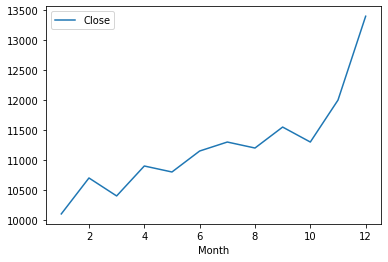

In [67]:
df_g = df_a[['Close']]
df_g.plot()

In [74]:
df_r = df_a.reset_index() # 기존에 인덱스는 살아서 컬럼으로 감.
# df_r
df_a = df_r.set_index('index') 
df_a.head()

time_delta  Close  Start   High    Low  Volume  \
index                                                                      
2019-01-01 00:00:00+09:00   176 days  10100  10850  10900  10000  137977   
2019-02-01 00:00:00+09:00   179 days  10700  10550  10900   9990  170253   
2019-03-01 00:00:00+09:00   180 days  10400  10900  10950  10150  155769   
2019-04-01 00:00:00+09:00   181 days  10900  10800  11050  10500  133548   
2019-05-01 00:00:00+09:00   182 days  10800  10900  11000  10700   63039   

                            Date_m  Year  Month  
index                                            
2019-01-01 00:00:00+09:00  2018-07  2018      7  
2019-02-01 00:00:00+09:00  2018-06  2018      6  
2019-03-01 00:00:00+09:00  2018-06  2018      6  
2019-04-01 00:00:00+09:00  2018-06  2018      6  
2019-05-01 00:00:00+09:00  2018-06  2018      6

In [76]:
df_sorted = df_a.sort_index(ascending=False) # 인덱스 역순
df_sorted.head()

time_delta  Close  Start   High    Low  Volume  \
index                                                                      
2019-12-01 00:00:00+09:00   193 days  13400  13600  13600  12900  201376   
2019-11-01 00:00:00+09:00   190 days  12000  13400  13400  12000  309787   
2019-10-01 00:00:00+09:00   189 days  11300  11850  11950  11300  180656   
2019-09-01 00:00:00+09:00   188 days  11550  11200  11600  10900  308596   
2019-08-01 00:00:00+09:00   187 days  11200  11350  11750  11200  133002   

                            Date_m  Year  Month  
index                                            
2019-12-01 00:00:00+09:00  2018-06  2018      6  
2019-11-01 00:00:00+09:00  2018-06  2018      6  
2019-10-01 00:00:00+09:00  2018-06  2018      6  
2019-09-01 00:00:00+09:00  2018-06  2018      6  
2019-08-01 00:00:00+09:00  2018-06  2018      6

In [77]:
df_value = df_a.sort_values(by='Volume',ascending=False)
df_value.head()

time_delta  Close  Start   High    Low  Volume  \
index                                                                      
2019-11-01 00:00:00+09:00   190 days  12000  13400  13400  12000  309787   
2019-09-01 00:00:00+09:00   188 days  11550  11200  11600  10900  308596   
2019-12-01 00:00:00+09:00   193 days  13400  13600  13600  12900  201376   
2019-10-01 00:00:00+09:00   189 days  11300  11850  11950  11300  180656   
2019-02-01 00:00:00+09:00   179 days  10700  10550  10900   9990  170253   

                            Date_m  Year  Month  
index                                            
2019-11-01 00:00:00+09:00  2018-06  2018      6  
2019-09-01 00:00:00+09:00  2018-06  2018      6  
2019-12-01 00:00:00+09:00  2018-06  2018      6  
2019-10-01 00:00:00+09:00  2018-06  2018      6  
2019-02-01 00:00:00+09:00  2018-06  2018      6

In [79]:
# Period 배열
pr_m = pd.period_range(start = '2019-01-01',
                     end = None,
                     periods = 3,
                     freq = 'M')
print(pr_m,'\n')
pr_h = pd.period_range(start = '2019-01-01',
                     end = None,
                     periods = 3,
                     freq = 'H') # 시간
print(pr_h)

PeriodIndex(['2019-01', '2019-02', '2019-03'], dtype='period[M]') 

PeriodIndex(['2019-01-01 00:00', '2019-01-01 01:00', '2019-01-01 02:00'], dtype='period[H]')


python, numpy, pandas 날짜 타입 비교 및 정리

In [81]:
# timestamp -> str변환
import time
today = time.time()
print(today,type(today),'\n')
s = str(today)
print(s,type(s))

1642396273.0480754 <class 'float'> 

1642396273.0480754 <class 'str'>


In [84]:
# datetime - > str 
from datetime import datetime
s = datetime.now().strftime('%Y-%m-%d %H:%M:%S') # str for time 으로 이해하자
print(s,type(s))

2022-01-17 14:14:31 <class 'str'>


In [86]:
# str -> timestamp변환 파이썬 버전
s = '2022-01-17 14:14:31'
ts = time.mktime(datetime.strptime(s,'%Y-%m-%d %H:%M:%S').timetuple()) # ts = timestamp, 
print(ts,type(ts))

1642396471.0 <class 'float'>


In [88]:
# str -> datetime
s = '2022-01-17 14:14:31'
dt = datetime.strptime(s,'%Y-%m-%d %H:%M:%S') #str을 time으로 p파싱한다 -> datetime으로 된다
print(dt,type(dt))

2022-01-17 14:14:31 <class 'datetime.datetime'>


In [87]:
# datetime -> timestamp
print(datetime.now(),type(datetime.now()),'\n')
ts = time.mktime(datetime.now().timetuple())
print(ts,type(ts))

2022-01-17 14:22:07.511447 <class 'datetime.datetime'> 

1642396927.0 <class 'float'>


### [과제]. str-> datetime , timestamp -> str - > datetime, datetime -> str -> timestamp

In [9]:
import datetime
from datetime import datetime
import time
import pandas as pd
import numpy as np

# str-> datetime 
s = '2022-01-08 22:41:50' # str생성
dt = datetime.strptime(s,'%Y-%m-%d %H:%M:%S') #str을 time으로 p파싱한다 -> datetime으로 된다
print(s,type(s)) 
print(dt,type(dt)) # datetime 변환

# timestamp -> str - > datetime
ts = time.mktime(datetime.now().timetuple())
print(ts,type(ts))

s1 = str(ts) # str 생성 (timestamp로 구성된)
print(s1,type(s1))

# datetime -> str -> timestamp
s2 = str(s)
dt1 = datetime.strptime(s2,'%Y-%m-%d %H:%M:%S') # str -> datetime 변환
print(dt1,type(dt1))

s3 = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print(s3,type(s3))

2022-01-08 22:41:50 <class 'str'>
2022-01-08 22:41:50 <class 'datetime.datetime'>
1642465058.0 <class 'float'>
1642465058.0 <class 'str'>
2022-01-08 22:41:50 <class 'datetime.datetime'>
2022-01-18 09:17:38 <class 'str'>


In [10]:
time_str='2022-01-18'
time_obj=datetime.strptime(time_str,"%Y-%m-%d")
print(time_str,type(time_str),'\n')
print(time_obj,type(time_obj),'\n')
#==================================================
time_re_str=datetime.strftime(time_obj,'%Y-%m-%d')
print(time_re_str,type(time_re_str),'\n')
time_float=time.mktime(datetime.strptime(time_re_str,'%Y-%m-%d').timetuple())
print(time_float,type(time_float),'\n')
#==================================================
time_str = str(datetime.fromtimestamp(time_float))    #timestamp를 (년-월-일...)str로 변환
print(time_str,type(time_str),'\n')
time_re_obj=datetime.strptime(time_str,'%Y-%m-%d %H:%M:%S')
print(time_re_obj,type(time_re_obj),'\n')



2022-01-18 <class 'str'> 

2022-01-18 00:00:00 <class 'datetime.datetime'> 

2022-01-18 <class 'str'> 

1642431600.0 <class 'float'> 

2022-01-18 00:00:00 <class 'str'> 

2022-01-18 00:00:00 <class 'datetime.datetime'> 



In [100]:
# 1년전 datetime값
from datetime import timedelta

datetime_now = datetime.now()
delta_datetime = timedelta(days=-365)
print(delta_datetime)
datetime_now + delta_datetime

-365 days, 0:00:00


datetime.datetime(2021, 1, 17, 14, 40, 56, 776308)

In [101]:
# 두 날짜간의 일수 구하기
since_timestamp = datetime.strptime('20180301','%Y%m%d')
until_timestamp = datetime.strptime('20180331','%Y%m%d')
result = until_timestamp - since_timestamp
result

datetime.timedelta(days=30)

In [106]:
# 특정 요일 구하기
import datetime
def get_yoil(y,m,d):
    days = ['MON','Tue','Wed','Thu','Fri','Sat','sun']
    return days[datetime.date(y,m,d).weekday()] # 월요일부터 인덱스 0 즉 0부터라는거고 숫자에 맞게 써야됨
get_yoil(2022,1,15)

'Sat'

In [111]:
# 판다스 이용
t = pd.Timestamp(1513393335,unit='s',tz ='US/pacific')
print(t,type(t))

2017-12-15 19:02:15-08:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [112]:
today = time.time()
today

1642399747.7422488

In [115]:
date = pd.Timestamp(1642399723.408825,unit='s',tz = 'Asia/Seoul')
print(date,type(date))

2022-01-17 15:08:43.408824921+09:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [119]:
pd.to_datetime([1,2,3],unit = 'D',origin=pd.Timestamp('1960-01-10'))

DatetimeIndex(['1960-01-11', '1960-01-12', '1960-01-13'], dtype='datetime64[ns]', freq=None)

In [123]:
pr_m = pd.period_range(start='2019-01-01',end = None,periods=3,freq='M')
pr_m

PeriodIndex(['2019-01', '2019-02', '2019-03'], dtype='period[M]')

In [131]:
import pandas as pd
import numpy as np
sr0 = pd.Series(pd.date_range('2021-01-01',periods=10,freq='D'),name='date')
sr1 = pd.Series(np.random.randint(1000,2000,10),name='price')
sr2 = pd.Series((np.random.rand(10)*100).round(2),name='profit')
df= pd.concat([sr0,sr1,sr2],axis=1)
df.head()

date  price  profit
0 2021-01-01   1509   44.49
1 2021-01-02   1258   58.89
2 2021-01-03   1458   32.01
3 2021-01-04   1417   96.06
4 2021-01-05   1939   29.45

In [135]:
import pandas as pd
df= pd.read_csv('./dataset/stock-data.csv')
df.head()

Date  Close  Start   High    Low  Volume
0  2018-07-02  10100  10850  10900  10000  137977
1  2018-06-29  10700  10550  10900   9990  170253
2  2018-06-28  10400  10900  10950  10150  155769
3  2018-06-27  10900  10800  11050  10500  133548
4  2018-06-26  10800  10900  11000  10700   63039

In [164]:
#Q datetime64 자료형으로 변환한 후에 period로 변환하고 년원일 표기 변경하여
# 년월을 인덱스로 출력
df= pd.read_csv('./dataset/stock-data.csv')
df1 = df.copy()
df1['new_Date'] = pd.to_datetime(df1.Date)
df1['Date_m']=df1.new_Date.dt.to_period(freq='M')
# df1['YM']= df1.new_Date.dt.to_period(freq='%Y-%m')

# df1
df1.set_index('Date_m',inplace=True)
df1

Date  Close  Start   High    Low  Volume   new_Date
Date_m                                                            
2018-07  2018-07-02  10100  10850  10900  10000  137977 2018-07-02
2018-06  2018-06-29  10700  10550  10900   9990  170253 2018-06-29
2018-06  2018-06-28  10400  10900  10950  10150  155769 2018-06-28
2018-06  2018-06-27  10900  10800  11050  10500  133548 2018-06-27
2018-06  2018-06-26  10800  10900  11000  10700   63039 2018-06-26
2018-06  2018-06-25  11150  11400  11450  11000   55519 2018-06-25
2018-06  2018-06-22  11300  11250  11450  10750  134805 2018-06-22
2018-06  2018-06-21  11200  11350  11750  11200  133002 2018-06-21
2018-06  2018-06-20  11550  11200  11600  10900  308596 2018-06-20
2018-06  2018-06-19  11300  11850  11950  11300  180656 2018-06-19
2018-06  2018-06-18  12000  13400  13400  12000  309787 2018-06-18
2018-06  2018-06-15  13400  13600  13600  12900  201376 2018-06-15
2018-06  2018-06-14  13450  13200  13700  13150  347451 2018-06-14
2018-06  2018-06-12  13200  12200  13300  12050  558148 2018-06-12
2018-06  2018-06-11  11950  12000  12250  11950   62293 2018-06-11
2018-06  2018-06-08  11950  11950  12200  11800   59258 2018-06-08
2018-06  2018-06-07  11950  12200  12300  11900   49088 2018-06-07
2018-06  2018-06-05  12150  11800  12250  11800   42485 2018-06-05
2018-06  2018-06-04  11900  11900  12200  11700   25171 2018-06-04
2018-06  2018-06-01  11900  11800  12100  11750   32062 2018-06-01

In [150]:
#Q datetime64 자료형으로 변환한 후 년,월,일로 분리하고 year을 인덱스로 셋팅하여 출력
df= pd.read_csv('./dataset/stock-data.csv')
df['new_Date'] = pd.to_datetime(df.Date)
df['Year']=df.new_Date.dt.year
df['Month']=df.new_Date.dt.month
df['Day']=df.new_Date.dt.day
df.set_index('Year',inplace=True)
df

Date  Close  Start   High    Low  Volume   new_Date  Month  Day
Year                                                                       
2018  2018-07-02  10100  10850  10900  10000  137977 2018-07-02      7    2
2018  2018-06-29  10700  10550  10900   9990  170253 2018-06-29      6   29
2018  2018-06-28  10400  10900  10950  10150  155769 2018-06-28      6   28
2018  2018-06-27  10900  10800  11050  10500  133548 2018-06-27      6   27
2018  2018-06-26  10800  10900  11000  10700   63039 2018-06-26      6   26
2018  2018-06-25  11150  11400  11450  11000   55519 2018-06-25      6   25
2018  2018-06-22  11300  11250  11450  10750  134805 2018-06-22      6   22
2018  2018-06-21  11200  11350  11750  11200  133002 2018-06-21      6   21
2018  2018-06-20  11550  11200  11600  10900  308596 2018-06-20      6   20
2018  2018-06-19  11300  11850  11950  11300  180656 2018-06-19      6   19
2018  2018-06-18  12000  13400  13400  12000  309787 2018-06-18      6   18
2018  2018-06-15  13400  13600  13600  12900  201376 2018-06-15      6   15
2018  2018-06-14  13450  13200  13700  13150  347451 2018-06-14      6   14
2018  2018-06-12  13200  12200  13300  12050  558148 2018-06-12      6   12
2018  2018-06-11  11950  12000  12250  11950   62293 2018-06-11      6   11
2018  2018-06-08  11950  11950  12200  11800   59258 2018-06-08      6    8
2018  2018-06-07  11950  12200  12300  11900   49088 2018-06-07      6    7
2018  2018-06-05  12150  11800  12250  11800   42485 2018-06-05      6    5
2018  2018-06-04  11900  11900  12200  11700   25171 2018-06-04      6    4
2018  2018-06-01  11900  11800  12100  11750   32062 2018-06-01      6    1

In [35]:
df = pd.read_csv('./dataset/auto-mpg.csv')
df1 = df.copy()
df.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


### [과제] 'mpg'를 'kpl'로 환산하여 새로운 열을 생성하고
### 3개행을 소수점 아래 둘재 자리에서 반올림 하세요.

In [31]:
# 1마일 = 1.60934km , 갤런당 마일
# 1갤런 = 3.78541 L
# kpl - 리터당 킬로미터
# 1마일 / 1갤런(1mpg) = 0.425kpl
mpg_to_kpl = 1.60934 / 3.78541
df1['kpl'] = round(df1['mpg'] * mpg_to_kpl,2)
df1.head(3) # 3개행을 헤드에 넣었다

mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   

   origin                   car name   kpl  
0       1  chevrolet chevelle malibu  7.65  
1       1          buick skylark 320  6.38  
2       1         plymouth satellite  7.65

In [20]:
# df['klp']=df.mpg.apply(lambda x : x*(0.425114/1))
# df[:3]['klp'].round(2)

0    7.65
1    6.38
2    7.65
Name: klp, dtype: float64

In [37]:
# df1.loc[:2,'kpl']=df1.loc[:2,'kpl'].round(2) # 위에 3개만 라운드로 하고 나머지는 그대로 나오게 함
# df1[['mpg','kpl']]

### [과제] horsepower 열을 체크해서 전처리가 필요한 사항을 기술하세요
### (자료형 타입이 문자로 되어있는 이유 및 float 처리)

In [41]:
# np.nan으로 대체하는게 팁이다->object인 이유는 어딘가에 문자로 된게 있기때문이다.
# unique()로 확인해보면 '?'로 되어있는데가 있음
df4 = df.copy()
# print(df2['horsepower'].unique())
df4['horsepower'].replace('?',np.nan,inplace=True) # 그래서 '?'를 NaN값으로 대체함
# df4 # 대체해서 맞는지 확인
# print(df4['horsepower'].unique()) # '?'가 nan값으로 잘 바뀌었는지 확인
df4['horsepower'] = df4['horsepower'].astype(float) # float에 '' 없어도 가능
# df4.horsepower = df4.horsepower.astype('float') # 이것도 가능 
df4.info() # float로 나오는걸 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


### [과제] 호스피 열의 자료형 타입 문제를 해결하고 NAN 개수 출력를 nan값 처리 전 후로 비교

In [53]:
print(df1.horsepower.isnull().sum()) # 제일 처음 복사본 df1에 nan의 개수를 출력
# df1.dropna(subset=['horsepower'], axis = 0, inplace = True) # 누락데이터 삭제
# df1.horsepower.isnull().sum() # 호스피만 구하는 방법, 처리가 아닌 삭제여서 drop써야됨
print(df4.horsepower.isnull().sum()) # 호스피열 nan값 처리후에 nan개수 출력

0
6


### [과제] auto_df를 바이너리 파일로 auto_df.pkl로 저장후 다시 불러

In [281]:
df1.to_pickle('./dataset/auto_df.pkl')
df_file = pd.read_pickle('./dataset/auto_df.pkl')
df_file

mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin                   car name    kpl  
0            70       1  chevrolet chevelle malibu   7.65  
1            70       1          buick skylark 320   6.38  
2            70       1         plymouth satellite   7.65  
3            70       1              amc rebel sst   6.80  
4            70       1                ford torino   7.23  
..          ...     ...                        ...    ...  
393          82       1            ford mustang gl  11.48  
394          82       2                  vw pickup  18.71  
395          82       1              dodge rampage  13.60  
396          82       1                ford ranger  11.90  
397          82       1                 chevy s-10  13.18  

[398 rows x 10 columns]

### [과제] 호스피 열의 최대값의 절대값으로 호스피열의 모든 데이터를 나눠서 저장

In [302]:
df5= df4.copy()
# power_max = df5['horsepower'].max() 최대값을 따로 만들고
# power_max_sr = pd.Series(power_max) abs가 시리즈랑 데이터프레임에서만 가능해서 시리즈로 바꾸고
# power_max_abs = power_max_sr.abs() 절대값으로 따로 생성
# df5['horsepower'] = df5['horsepower'] / power_max_abs 하면은 맨 처음만 되고 그 뒤로는 안됨
# 방법이 있을텐데 

# print(df5.horsepower.describe()) 통계요약표로 보는법
# print(df5['horsepower'].max()) 그냥 max함수 써서 가능
# print(df5.horsepower.max()) 이것도 가능
df5.horsepower =df5.horsepower / abs(df5.horsepower.max())
print(df5.horsepower.head())

0    0.565217
1    0.717391
2    0.652174
3    0.652174
4    0.608696
Name: horsepower, dtype: float64


### [과제] 호스피 각 열 데이터에서 해당 열의 최소값을 뺀 값을 분자, 해당열의 최대값 - 최소값을 분모로 계산하여 저장

In [321]:
df6 = df4.copy()
# print(df6.horsepower.min()) # 최소값은 46
df6.horsepower_numerator = df6.horsepower - df6.horsepower.min()
df6.horsepower_denominator = df6.horsepower.max() - df6.horsepower.min() # 최대값 230-46
df6.horsepower_result = df6.horsepower_numerator / df6.horsepower_denominator
df6.horsepower_result

0      0.456522
1      0.646739
2      0.565217
3      0.565217
4      0.510870
         ...   
393    0.217391
394    0.032609
395    0.206522
396    0.179348
397    0.195652
Name: horsepower, Length: 398, dtype: float64

In [ ]:
# lambda 함수 써서 하는게 더 편하네
# a=min(df6.horsepower)
# b=max(df6.horsepower)
# df6.horsepower=df6.horsepower.apply(lambda x:(x-a)/(b-a))
# df6.horsepower.head()

### [과제] origin열의 고유값을 출력 

In [55]:
print(df1['origin'].unique())
df1.origin.unique()

[1 3 2]


array([1, 3, 2], dtype=int64)

### [과제] 정수형 데이터를 문자형으로 변환후 고유값 출력(1:'USA',2:'EU',3:'JAPAN')

In [56]:
df_origin = df.copy()
# df_origin['origin'].replace({1:'USA',2:'EU',3:'JAPAN'},inplace=True) # 다 된다
df_origin.origin.replace({1:'USA',2:'EU',3:'JAPAN'},inplace=True)
print(df_origin.origin.unique())

['USA' 'JAPAN' 'EU']


### [과제] orgin 열의 자료형을 확인하고 범주형(category) 변환

In [243]:
print(df_origin['origin'].dtype) # object형인걸 확인
df_origin['origin'] = df_origin['origin'].astype('category')
print(df_origin['origin'].dtype) 

object
category


### [과제] origin열을 범주에서 문자열로 변환후 자료형을 출력

In [244]:
df_origin['origin'] = df_origin['origin'].astype('str')
print(df_origin['origin'].dtype) 

object


### [과제] 호스피를 3개의 bin으로 나누고 bin_names=['저출력','보통출력','고출력']으로 출력 ( np.histogram()함수로 3개의 bin으로 나눔)

In [64]:
import numpy as np
# count,bin_dividers = np.histogram(df4.horsepower,bins=3) # nan값을 drop을 안하면 안됨
count,bin_dividers = np.histogram(np.array(df4.horsepower),
                bins=3,
                range=[df4.horsepower.min(),df4.horsepower.max()],
                normed=None,
                weights=None,
                density=None)
print(bin_dividers)
bin_names = ['저출력','보통출력','고출력']
df4['hp_bin'] = pd.cut(x=df4.horsepower, # 데이터 배열
       bins=bin_dividers, # 경계 값 리스트
       labels=bin_names, # bin 이름
       include_lowest=True) # 첫 경계값 포함할지를 결정 
df4[['horsepower','hp_bin']].head(10)

[ 46.         107.33333333 168.66666667 230.        ]


horsepower hp_bin
0       130.0   보통출력
1       165.0   보통출력
2       150.0   보통출력
3       150.0   보통출력
4       140.0   보통출력
5       198.0    고출력
6       220.0    고출력
7       215.0    고출력
8       225.0    고출력
9       190.0    고출력

### [과제] 호스피 열의 최대값의 절대값으로 모든 데이터를 나누느 정규화를 수행한 후 통계요약표를 출력

In [322]:
print(df5.horsepower.describe()) # describe함수가 통계요약표를 출력하는 함수
# 최대값의 절대값으로 모든 데이터를 나누는 정규화는 위에서 수행해서 그 값을 그대로 가지고 와서 그냥
# describe만 넣었음

count    392.000000
mean       0.454215
std        0.167353
min        0.200000
25%        0.326087
50%        0.406522
75%        0.547826
max        1.000000
Name: horsepower, dtype: float64
